<a href="https://www.kaggle.com/code/jbngcrs/online-retail-analysis?scriptVersionId=117461085" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Data
retail = pd.read_csv('/kaggle/input/online-retail-dataset/online_retail.csv', index_col=False)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Checking of null values
missing_values_count = retail.isnull().sum()
missing_values_count[0:8]

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
#Checking of rows and Columns
rows = len(retail.axes[0])
columns = len(retail.axes[1])

print("Number of Rows:",rows)
print("Number of Columns:",columns)

Number of Rows: 541909
Number of Columns: 8


    As you can see, there are 1454 null values in Description Column while CustomerID containts 135080 null values. We gonna replace null values in Description with 'None' and '0' in CustomerID. We cannot have null values especially in customerID because it is important to our transaction analysis. Also, I add another column 'Status' to identify the transaction if its succesfull or Cancelled. 

In [5]:
#Data Cleaning and Manipulation
retail['Cancelled'] = retail['InvoiceNo'].str.find('C', start = 0)#if its true = 0 then false = -1
retail['Description'] = retail['Description'].fillna('None')
retail['Description'] = retail['Description'].str.strip()
retail['CustomerID'] = retail['CustomerID'].fillna('0')

In [6]:
#Checking of null values
missing_values_count = retail.isnull().sum()
missing_values_count[0:8]

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

    As you can see, there is no null values anymore. Let's proceed in checking of data types if there are columns that in need of changing the data types. 

In [7]:
#Checking of Dtypes
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
 8   Cancelled    541909 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 37.2+ MB


As you can see, the data type of InvoideDate is object and CustomerID is float64. We need to change the InvoiceDate to Datetime in order to extract the Year and Month for our analysis.For the customerID, we need to change it to int in order to remove decimals because there is no decimal in IDs.

In [8]:
#Data Cleaning and Manipulaton 
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['Year'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%Y')
retail['Month'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%m')
retail['CustomerID'] = retail['CustomerID'].astype(int)
retail['Total_Sales'] = retail['Quantity']*retail['UnitPrice']


In [9]:
#Checking Dtypes
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
 8   Cancelled    541909 non-null  int64         
 9   Year         541909 non-null  object        
 10  Month        541909 non-null  object        
 11  Total_Sales  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 49.6+ MB


In [10]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,-1,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,-1,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,-1,2010,12,20.34


We are now done in cleaning the dataset, let's proceed to the analysis. 

Text(0.5, 1.0, 'Top 5 Countries with most sales ')

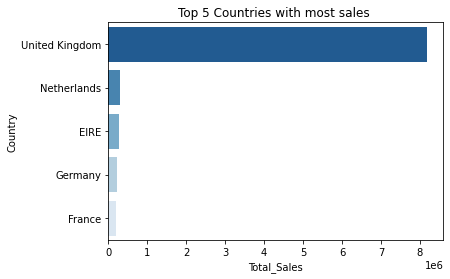

In [11]:
#Analysis and Visualization

total_sales_per_country = retail.groupby('Country')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_country.head(5), x='Total_Sales',y='Country',palette = 'Blues_r')
plt.title("Top 5 Countries with most sales ")

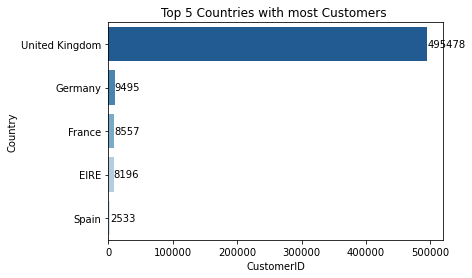

In [12]:
total_customer_per_country = retail.groupby('Country')['CustomerID'].count().reset_index().sort_values('CustomerID',ascending=False)
z = sns.barplot(data=total_customer_per_country.head(5), x='CustomerID',y='Country',palette = 'Blues_r')
plt.title("Top 5 Countries with most Customers ")
for i in z.containers:
    z.bar_label(i,)

Text(0.5, 1.0, 'Sales per Year ')

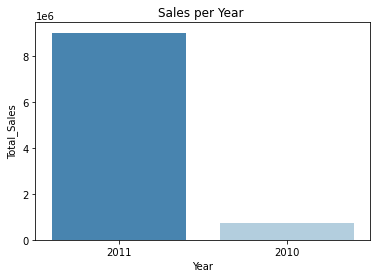

In [13]:
total_sales_per_year = retail.groupby('Year')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_year, x='Year',y='Total_Sales',palette = 'Blues_r')
plt.title("Sales per Year ")

Text(0.5, 1.0, 'Sales per Month')

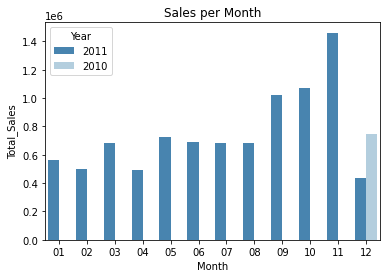

In [14]:
total_sales_per_month = retail.groupby(['Month','Year'])['Total_Sales'].sum().reset_index()
z = sns.barplot(data=total_sales_per_month, y='Total_Sales',x='Month',hue='Year',palette = 'Blues_r')
plt.title("Sales per Month")


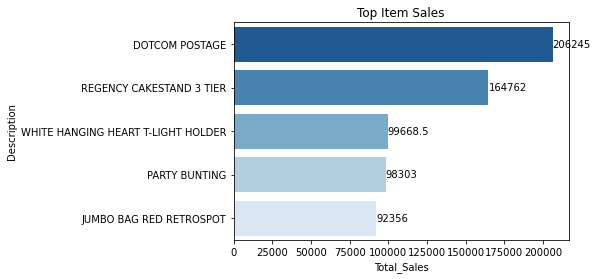

In [15]:
total_sales_per_category = retail.groupby('Description')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_category.head(5), y='Description',x='Total_Sales',palette = 'Blues_r')
plt.title("Top Item Sales")
for i in z.containers:
    z.bar_label(i,)

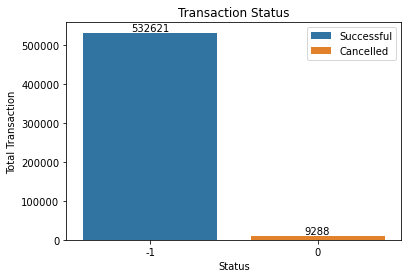

In [16]:
#total_cancelled = retail.groupby(['Cancelled']).count().reset_index()
z = sns.countplot(x=retail['Cancelled'], hue = retail['Cancelled'], dodge=False )
plt.ylabel("Total Transaction")
plt.xlabel("Status")
plt.title("Transaction Status")
labels = ["Successful","Cancelled"]
z.legend(labels)
for i in z.containers:
    z.bar_label(i,)



I'm just a beginner and still learning. Suggestions for improvement are open. Thank you! 